In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

import warnings
warnings.filterwarnings('ignore')

import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import get_example_dataset
from mavenn.src.utils import ge_plots_for_mavenn_demo
from mavenn.src.utils import onehot_encode_array, _generate_nbr_features_from_sequences, _generate_all_pair_features_from_sequences
from mavenn.src.utils import _center_matrix

import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
from sklearn.model_selection import train_test_split
from mavenn.src.utils import ge_plots_for_mavenn_demo, get_example_dataset

# load data
X, y = get_example_dataset(name='MPSA')

#X = X[0:50000].copy()
#y = y[0:50000].copy()

In [3]:
# from sklearn.model_selection import train_test_split
# from mavenn.src.utils import ge_plots_for_mavenn_demo, get_example_dataset

# # load data
# X, y = get_example_dataset(name='MPSA')

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y)

# load mavenn's GE model
gpmap_type = 'pairwise'
noise_model = 'SkewedT'
GER = mavenn.Model(regression_type='GE',
                   X=x_train,
                   y=y_train,
                   gpmap_type=gpmap_type,
                   noise_model=noise_model,
                   monotonic=True,
                   learning_rate=0.003,
                   test_size=0.1,
                   num_nodes_hidden_measurement_layer=20,
                   alphabet='rna',
                   polynomial_order_ll=5)

In [4]:
GER.model.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay (None, 613)          0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 612)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phi (Dense)                     (None, 1)            613         Sequence_only[0][0]              
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           40          phi[0][0]                        
__________________________________________________________________________________________________
y_hat (Den

In [5]:
GER.fit(epochs=20,
        early_stopping=False,
        #early_stopping_patience=10,
        validation_split=0.1,
        verbose=1)

# make predictions on held out test set

# predictions = GER.predict(x_test)

Train on 21057 samples, validate on 2340 samples
Epoch 1/20
21057/21057 [==============================] - 5s 241us/step - loss: 0.5813 - val_loss: -0.0493
Epoch 2/20
21057/21057 [==============================] - 2s 91us/step - loss: -0.1675 - val_loss: -0.1784
Epoch 3/20
21057/21057 [==============================] - 2s 88us/step - loss: -0.2117 - val_loss: -0.1885
Epoch 4/20
21057/21057 [==============================] - 2s 86us/step - loss: -0.2210 - val_loss: -0.1877
Epoch 5/20
21057/21057 [==============================] - 2s 94us/step - loss: -0.2169 - val_loss: -0.1788
Epoch 6/20
21057/21057 [==============================] - 2s 91us/step - loss: -0.2221 - val_loss: -0.1982
Epoch 7/20
21057/21057 [==============================] - 2s 106us/step - loss: -0.2251 - val_loss: -0.1987
Epoch 8/20
21057/21057 [==============================] - 2s 98us/step - loss: -0.2274 - val_loss: -0.1714
Epoch 9/20
21057/21057 [==============================] - 2s 97us/step - loss: -0.2265 - val_l

In [6]:
loss_history = GER.model.history

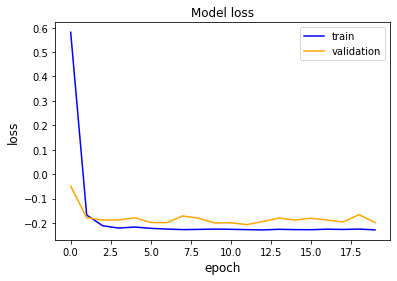

In [7]:
plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [8]:
yhat = GER.predict(x_test)
phi = GER.gpmap(x_test)


In [9]:




phi_range = np.linspace(min(phi),max(phi),1000)

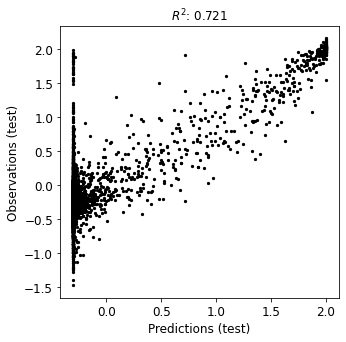

In [10]:
# plt.figure(figsize=(1.5,1.5))
# Rsq = np.corrcoef(yhat,y_test)[0][1]**2
# plt.scatter(yhat,y_test,color='gray',s=1,alpha=0.5)
# plt.xlabel('$\hat{y}$',fontsize=7.5)
# plt.ylabel('$y$',fontsize=7.5)
# plt.title('$R^2$: '+str(Rsq)[0:5],fontsize=7.5)
# plt.tick_params(labelsize=7.5)
# plt.show()

plt.figure(figsize=(5,5))
Rsq = np.corrcoef(yhat,y_test)[0][1]**2
plt.scatter(yhat,y_test,color='black',s=5,alpha=1)
plt.xlabel('Predictions (test)',fontsize=12)
plt.ylabel('Observations (test)',fontsize=12)
plt.title('$R^2$: '+str(Rsq)[0:5],fontsize=12)
plt.tick_params(labelsize=12)
#plt.savefig('mavenn_mpsa_additive_gaussian_observations_vs_preds_test.png',bbox_inches='tight',dpi=600)
plt.show()

In [11]:
GER.model.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay (None, 613)          0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 612)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phiPrime (Dense)                (None, 1)            613         lambda[0][0]                     
__________________________________________________________________________________________________
fix_diffeomorphic_mode (fixDiff (None, 1)            0           phiPrime[0][0]                   
__________________________________________________________________________________________________
phi (Dense

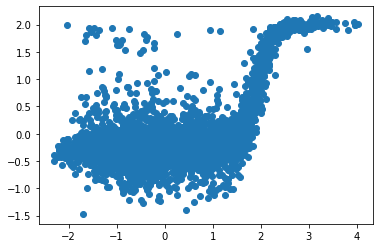

In [12]:
plt.scatter(phi,y_test)

In [13]:
# log_a = GER.get_nn().layers[9].get_weights()[0][0][0]
# log_b = GER.get_nn().layers[9].get_weights()[1][0][0]
# log_scale = GER.get_nn().layers[9].get_weights()[2][0][0]

# log_a,log_b,log_scale

model = GER.get_nn()
#     w = model.layers[9].get_weights()[0][0][0]
#     a = model.layers[9].get_weights()[1][0][0]
#     b = model.layers[9].get_weights()[2][0][0]
#     c = model.layers[9].get_weights()[3][0][0]

In [14]:
GER.model.model.layers[9].get_weights()

[array([[ 0.40587816],
        [ 0.35240656],
        [ 0.02699544],
        [ 0.05593415],
        [ 0.07452127],
        [-0.04137216]], dtype=float32), array([[ 0.22915637],
        [ 0.36072388],
        [ 0.17587087],
        [ 0.07996084],
        [-0.00246256],
        [-0.01800702]], dtype=float32), array([[-1.7704022 ],
        [ 0.905708  ],
        [-0.30626512],
        [-0.03436579],
        [-0.10494194],
        [ 0.00783748]], dtype=float32)]

In [15]:
# plt.scatter(yhat,np.exp(log_scale),label='scale')
# plt.scatter(yhat,np.exp(log_a),label='a')
# plt.scatter(yhat,np.exp(log_b),label='b')
# plt.legend(fontsize=14)
# plt.xlabel('yhat',fontsize=14)
# plt.ylabel('SkewedT Parameters',fontsize=14)
# plt.title('Polynomial Dependence (order=2)')
# plt.tick_params(labelsize=14)

In [16]:
from mavenn.src.utils import ComputeSkewedTQuantiles

plt.figure(figsize=(8,6))
phi_range = np.linspace(min(phi),max(phi),1000)

yhat_GE = GER.ge_nonlinearity(phi_range)

<Figure size 576x432 with 0 Axes>

In [17]:
#ComputeSkewedTQuantiles.y_quantile(0.5,yhat,np.exp(log_scale),np.exp(log_a),np.exp(log_b))
quantiles = ComputeSkewedTQuantiles(GER,yhat_GE)

In [24]:
# quantiles.plus_sigma_quantile
# quantiles.minus_sigma_quantile

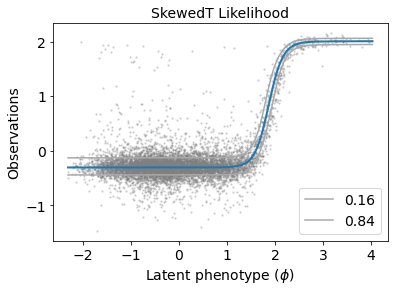

In [27]:
plt.plot(phi_range,yhat_GE,lw=2)

plt.scatter(phi,y_test,color='gray',s=2,alpha=0.25)
#plt.plot(phi_range,GER.ge_nonlinearity(phi_range),color='black',lw=3,label='$\hat{y}$')

plt.plot(phi_range,quantiles.plus_sigma_quantile,label='0.16',color='darkgray')
plt.plot(phi_range,quantiles.minus_sigma_quantile,label='0.84',color='darkgray')


plt.tick_params(labelsize=14)

leg = plt.legend(fontsize=14)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    #lh.set_sizes([5.0])
      

plt.ylabel('Observations',fontsize=14)
plt.xlabel('Latent phenotype ($\phi$)',fontsize=14)
plt.title(noise_model+' Likelihood',fontsize=14)
plt.show()


In [20]:
nn_model = GER.get_nn()
nn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay (None, 613)          0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 612)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phiPrime (Dense)                (None, 1)            613         lambda[0][0]                     
__________________________________________________________________________________________________
fix_diffeomorphic_mode (fixDiff (None, 1)            0           phiPrime[0][0]                   
__________________________________________________________________________________________________
phi (Dense

In [21]:
nn_model.layers[2].get_weights()[0].shape,nn_model.layers[2].get_weights()[1].shape

((612, 1), (1,))

In [22]:
len(GER.model.characters)

4

In [23]:
salmon

NameError: name 'salmon' is not defined

In [ ]:
#GER.get_gpmap_parameters()

Sailer Harms code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from epistasis.models import EpistasisLinearRegression
from epistasis.pyplot import plot_coefs

from epistasis.models.nonlinear import EpistasisPowerTransform
from epistasis.pyplot.nonlinear import plot_power_transform

from gpmap import GenotypePhenotypeMap
MPSA_WT = 'CAGGUAAGU'
import mavenn
from mavenn.src.utils import get_example_dataset
X, y = get_example_dataset(name='MPSA')

gpm = GenotypePhenotypeMap(MPSA_WT,X,y)

# Fit Power transform
model = EpistasisPowerTransform(lmbda=3, A=0, B=0)
model.add_gpm(gpm)
model.fit()

# Create plot
fig, ax = plt.subplots(figsize=(10,10))
plot_power_transform(model, cmap='plasma', ax=ax, yerr=0.6, s=10)

ax.set_xlabel('Padd', fontsize=14)
ax.set_ylabel('Pobs', fontsize=14)
ax.set_title('Sailer/Harms, Power Transform - lmbda = 3')
fig.savefig('powerTransformLambda3.png',bbox_inches='tight')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from epistasis.models import EpistasisLinearRegression
from epistasis.pyplot import plot_coefs

from epistasis.models.nonlinear import EpistasisPowerTransform
from epistasis.pyplot.nonlinear import plot_power_transform

from epistasis.models import EpistasisSpline

from gpmap import GenotypePhenotypeMap
MPSA_WT = 'CAGGUAAGU'
import mavenn
from mavenn.src.utils import get_example_dataset
X, y = get_example_dataset(name='MPSA')

gpm = GenotypePhenotypeMap(MPSA_WT,X,y)

# Fit Power transform
model = EpistasisSpline(k=3)
model.add_gpm(gpm)
model.fit()

# Create plot
fig, ax = plt.subplots(figsize=(10,10))
plot_power_transform(model, cmap='plasma', ax=ax, yerr=0.6, s=10)

ax.set_xlabel('Padd', fontsize=14)
ax.set_ylabel('Pobs', fontsize=14)
ax.set_title('Sailer/Harms, Model Spline')
fig.savefig('ModelSpline.png',bbox_inches='tight')

In [ ]:
from gpmap import GenotypePhenotypeMap
from epistasis.models import EpistasisSpline

wildtype = 'AA'
genotypes = ['AA', 'AT', 'TA', 'TT']
phenotypes = [0.1, 0.2, 0.7, 1.2]

# Read genotype-phenotype map.
gpm = GenotypePhenotypeMap(wildtype, genotypes, phenotypes)

# Initialize the data.
model = EpistasisSpline(k=3)

# Add Genotype-phenotype map data.
model.add_gpm(gpm)

# Fit the model.
model.fit()